<a href="https://colab.research.google.com/github/j0k3rD/Artificial-Intelligence/blob/main/Analisis_Predictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Estadistico

In [ ]:
!wget https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

--2023-08-28 21:57:25--  https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1700 (1.7K) [text/plain]
Saving to: ‘mtcars.csv’

mtcars.csv          100%[===================>]   1.66K  --.-KB/s    in 0s      

2023-08-28 21:57:25 (27.9 MB/s) - ‘mtcars.csv’ saved [1700/1700]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [ ]:
cars = pd.read_csv('/content/mtcars.csv')
cars.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [ ]:
cars.tail(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## Estadistica de tendencia central

In [ ]:
cars.disp.mean()

230.72187499999998

In [ ]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


<Axes: xlabel='disp', ylabel='Count'>

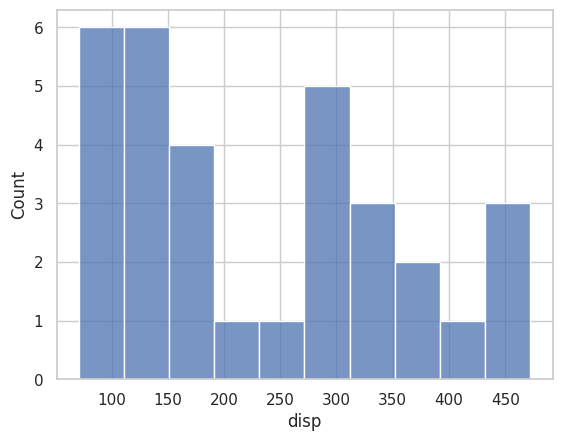

In [ ]:
sns.histplot(cars['disp'], bins=10)

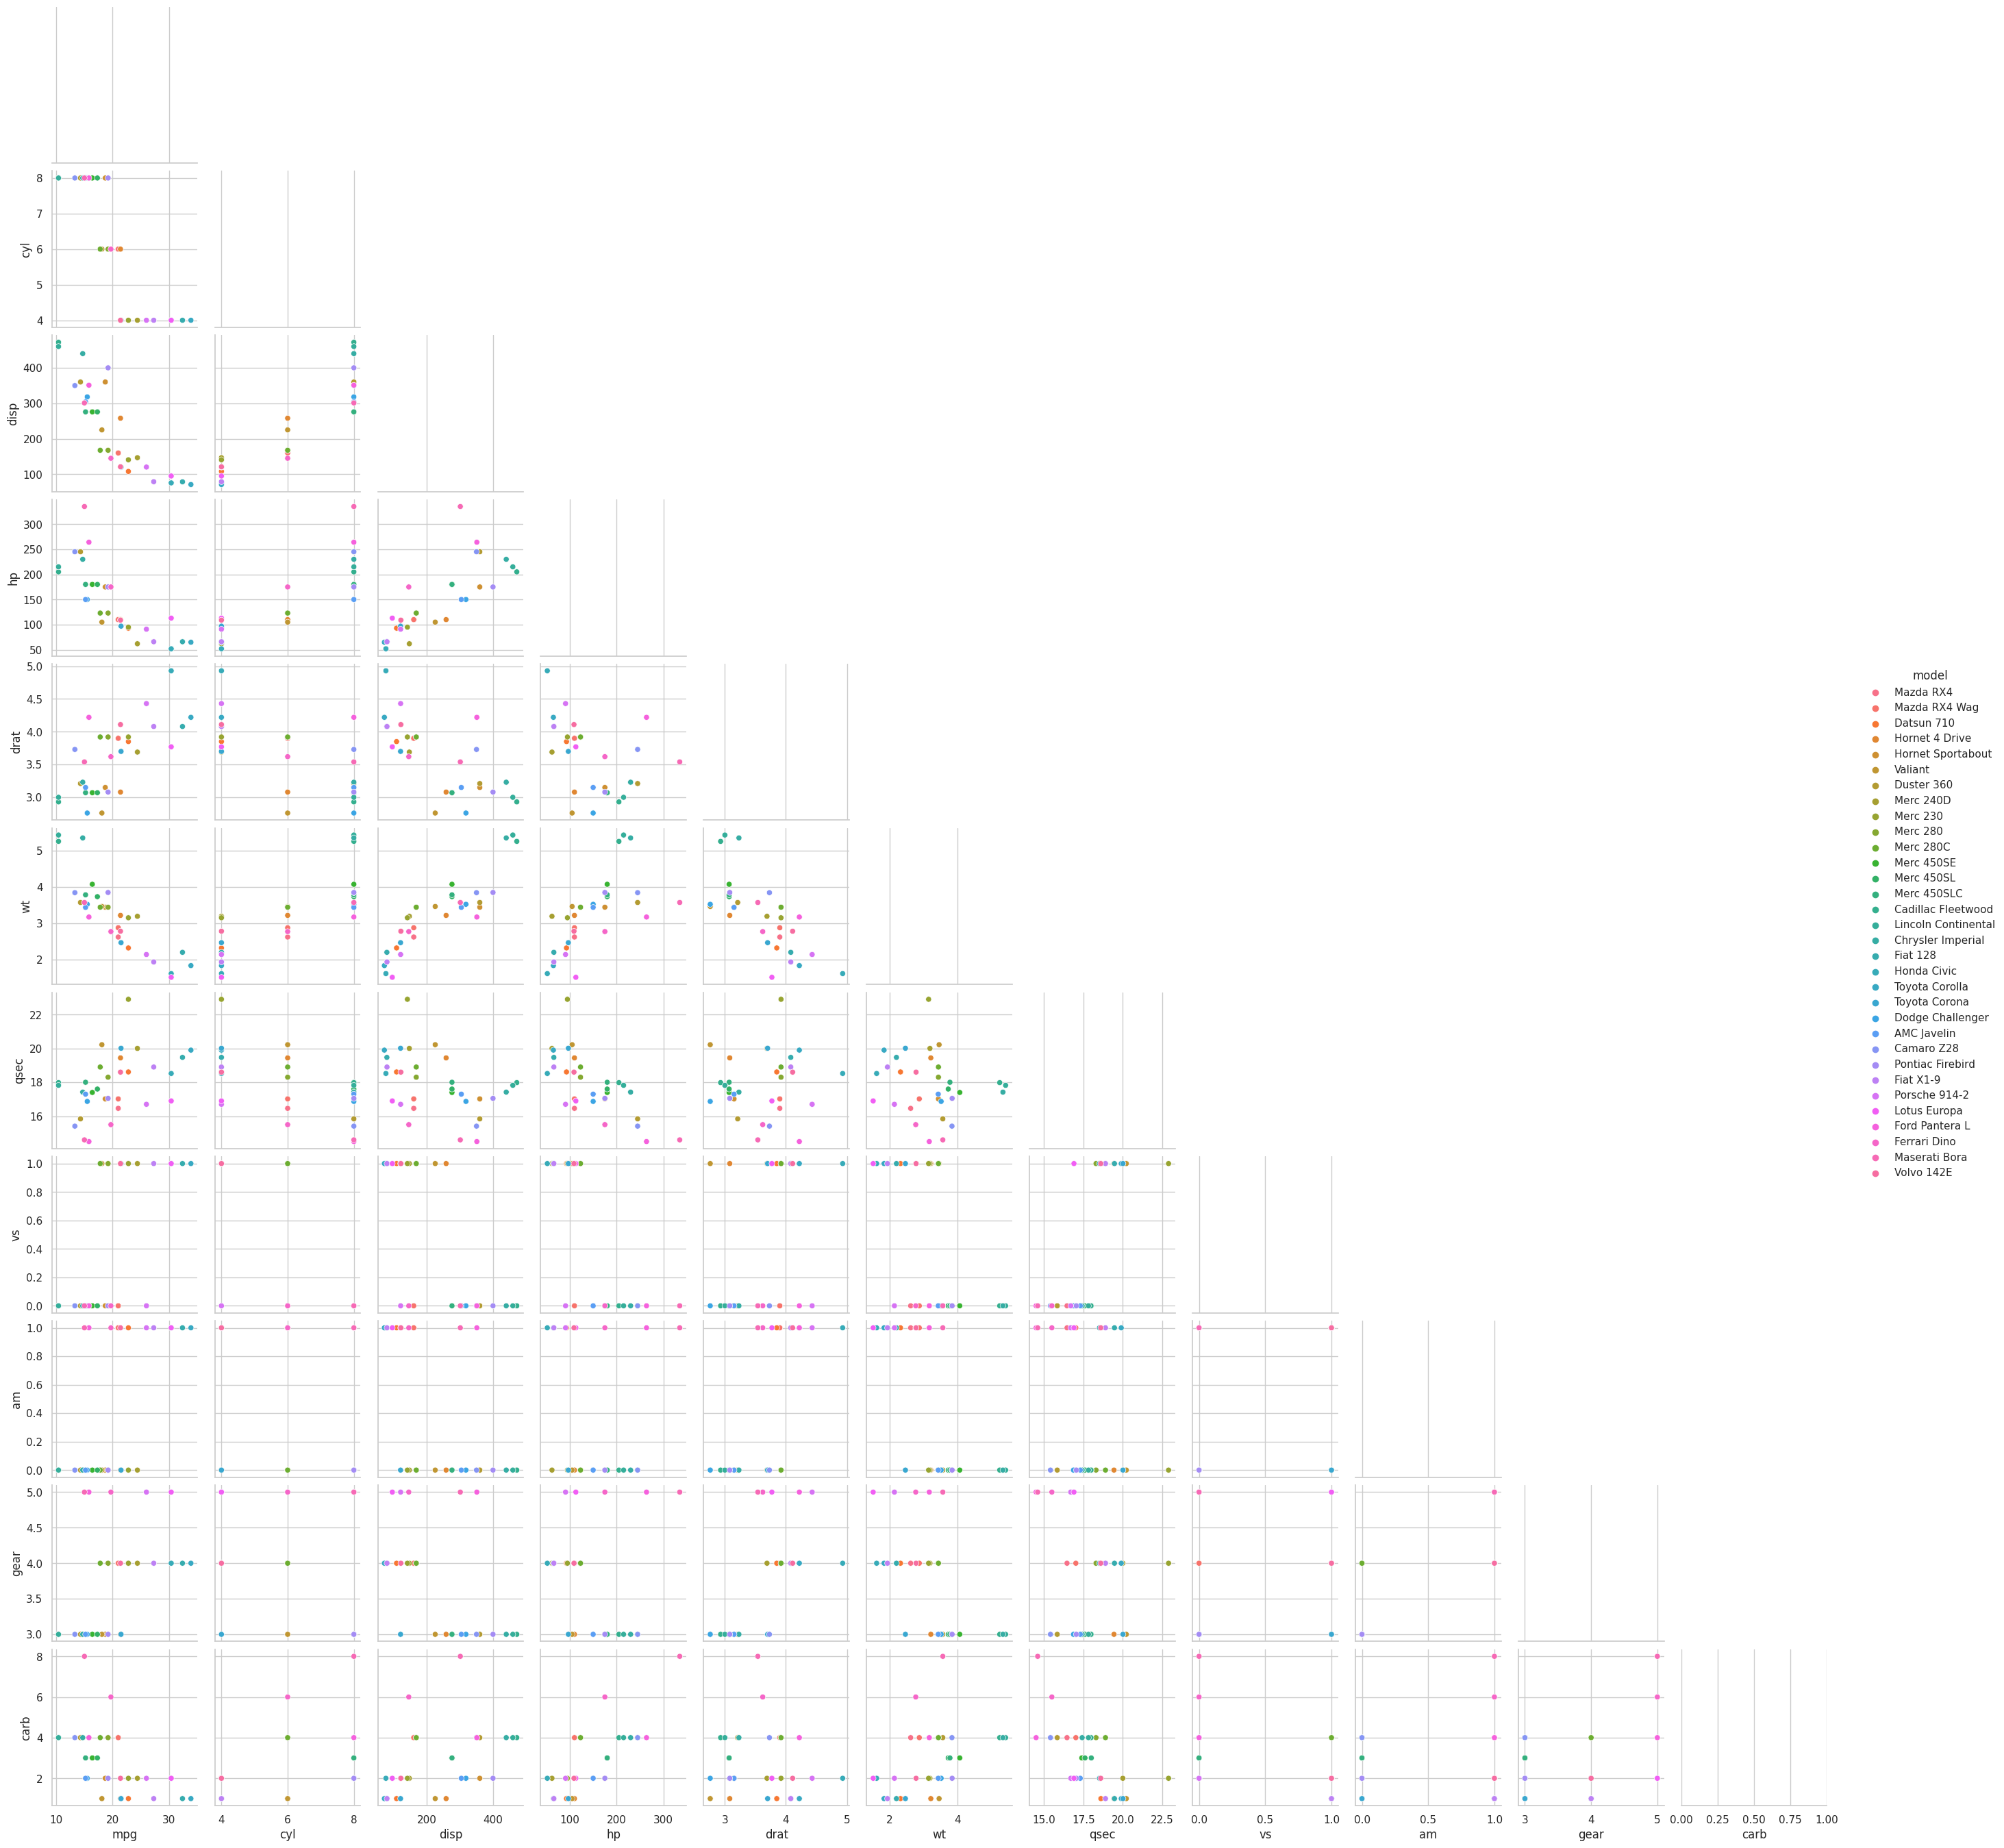

In [31]:
sns.pairplot(cars, hue='model', corner=True); #Podemos ver la distribucion de la variable y como se comporta con la otra.
# Para quitar peso ponemos corner=True, se quita la duplicacion de ploteos.
# hue='model' es para que a cada modelo lo pinte de un color

## Construimos un df para realizar un analisis predictivo

Los pasos son los siguientes:

1. Observar el comportamiento grafico de dichas variables.
2. Observar numericamente si las variables siguen una distribucion normal.

  - Shapiro Wilk es el test de `normalidad` por exelencia.
  - Kolmogorov Smirnov es un test de `distribuciones a especificar`.

3. Realizar un test de correlacion bivariado:

  - Si los datos se distribuyen normal -> Pearson
  - Si los datos no se distribuyen normal y son muchos -> Kendall's Tau
  - Si no -> Spearman

4. Predictive Power Score: el poder predictivo que tienen las variables `regresoras` sobre las variables `tarjet` u `objetivo`.
5. Modelar con ML la relacion entre las variables de entrada o `features` para predecir el `target`.

In [70]:
df = cars[['mpg', 'wt', 'disp', 'drat', 'hp']] # Cuando se eligen columnas se pone doble corchete
df.head(2)

,mpg,wt,disp,drat,hp
0,21.0,2.620,160.0,3.9,110
1,21.0,2.875,160.0,3.9,110


In [47]:
# Test de Normalidad
from scipy import stats

for i in range(df.shape[1]):
  print(f'\nVariable {i} | {stats.shapiro(df.iloc[i])}')


Variable 0 | ShapiroResult(statistic=0.8286852836608887, pvalue=0.13599258661270142)

Variable 1 | ShapiroResult(statistic=0.8277010321617126, pvalue=0.13368923962116241)

Variable 2 | ShapiroResult(statistic=0.8193248510360718, pvalue=0.11537402868270874)

Variable 3 | ShapiroResult(statistic=0.7967151403427124, pvalue=0.07616954296827316)

Variable 4 | ShapiroResult(statistic=0.7934567928314209, pvalue=0.07159433513879776)


(array([3., 8., 2., 2., 4., 6., 5., 1., 0., 1.]),
 array([2.76 , 2.977, 3.194, 3.411, 3.628, 3.845, 4.062, 4.279, 4.496,
        4.713, 4.93 ]),
 <BarContainer object of 10 artists>)

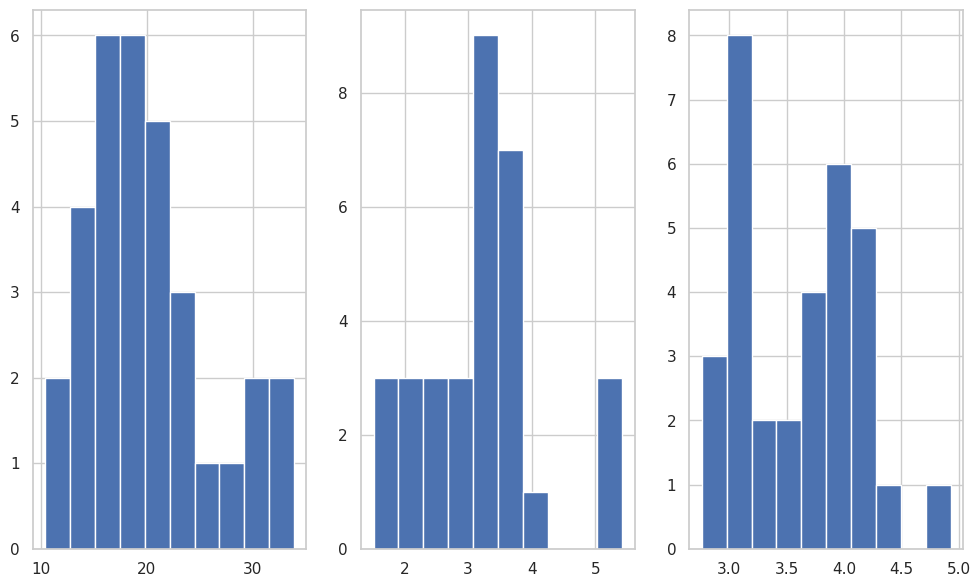

In [71]:
fig,axs = plt.subplots(1,3,figsize=(12,7))
axs[0].hist(df['mpg'])
axs[1].hist(df['wt'])
axs[2].hist(df['drat'])

In [65]:
df.corr(method='spearman')

,mpg,wt,disp,hp
mpg,1.000000,-0.886422,-0.908882,-0.894665
wt,-0.886422,1.000000,0.897706,0.774677
disp,-0.908882,0.897706,1.000000,0.851043
hp,-0.894665,0.774677,0.851043,1.000000


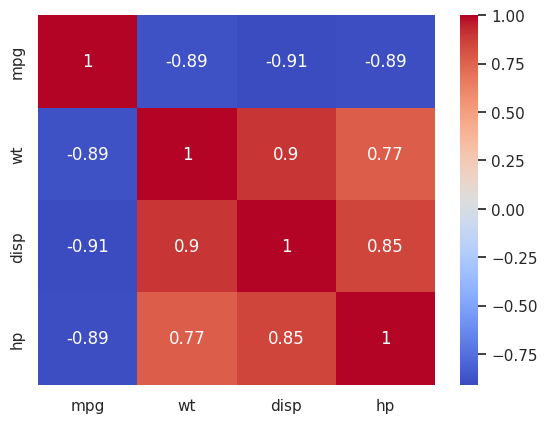

In [67]:
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True);
# Rojo
# Azul correlacion..

In [72]:
df = df.drop(columns='drat')
df.head(2)
# Para volver, volve a ejecutar el df de arriba.

,mpg,wt,disp,hp
0,21.0,2.620,160.0,110
1,21.0,2.875,160.0,110


In [73]:
# Power Prediction Score
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=87b85c4fcd59e239e1fabfc2624dbba9d69d0d5ded8cf5e478a42f2128eeb9b6
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [74]:
import ppscore as pps

In [75]:
pps.predictors(df,'mpg')
#Nos deja la variable a predecir como estatica y la evalua con las demas. wt para mpg es de 0.41. No esta bien, lo ideal es de 1.

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,wt,mpg,0.411216,regression,True,mean absolute error,4.634375,2.728646,DecisionTreeRegressor()
1,hp,mpg,0.364689,regression,True,mean absolute error,4.634375,2.944271,DecisionTreeRegressor()
2,disp,mpg,0.324005,regression,True,mean absolute error,4.634375,3.132812,DecisionTreeRegressor()


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [79]:
x = df.drop(columns='mpg').to_numpy()
y = df['mpg'].to_numpy()
print(f"Shape of X: {x.shape} | Shape of Y: {y.shape}")

Shape of X: (32, 3) | Shape of Y: (32,)


In [81]:
lr.fit(x,y)

LinearRegression()

In [83]:
#R2
lr.score(x,y) # Nos dicen que las variables explican al modelo en un 82%. Es bueno.

0.8268361424946447

In [84]:
from sklearn import metrics as ms

In [89]:
y_pred = lr.predict(x)
mae = ms.mean_absolute_error(y_true=y, y_pred=y_pred)
mse = ms.mean_squared_error(y_true=y, y_pred=y_pred)
r2 = ms.r2_score(y_true=y, y_pred=y_pred)
rmse = np.sqrt(ms.mean_squared_error(y_true=y, y_pred=y_pred))

In [92]:
print(f'Mae: {mae}\nMse: {mse}\nR2: {r2}\nRmse: {rmse}')

Mae: 1.9070264019715115
Mse: 6.09345858501738
R2: 0.8268361424946447
Rmse: 2.468493181075731


In [93]:
df.describe()

,mpg,wt,disp,hp
count,32.000000,32.000000,32.000000,32.000000
mean,20.090625,3.217250,230.721875,146.687500
std,6.026948,0.978457,123.938694,68.562868
min,10.400000,1.513000,71.100000,52.000000
25%,15.425000,2.581250,120.825000,96.500000
50%,19.200000,3.325000,196.300000,123.000000
75%,22.800000,3.610000,326.000000,180.000000
max,33.900000,5.424000,472.000000,335.000000
